In [16]:
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [17]:
# Matplotlib config
font = {'size'   : 18, 'family':'STIXGeneral'}
axislabelfontsize='large'
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (10,6)

In [18]:
# mnist data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [19]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [20]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [21]:
# Train the model.
train = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
  validation_data=(test_images,to_categorical(test_labels))
)

predc = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5784 - accuracy: 0.8259 - val_loss: 0.2376 - val_accuracy: 0.9260
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2015 - accuracy: 0.9386 - val_loss: 0.1598 - val_accuracy: 0.9513
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1463 - accuracy: 0.9553 - val_loss: 0.1409 - val_accuracy: 0.9573
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1225 - accuracy: 0.9624 - val_loss: 0.1364 - val_accuracy: 0.9581
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1067 - accuracy: 0.9663 - val_loss: 0.1168 - val_accuracy: 0.9630


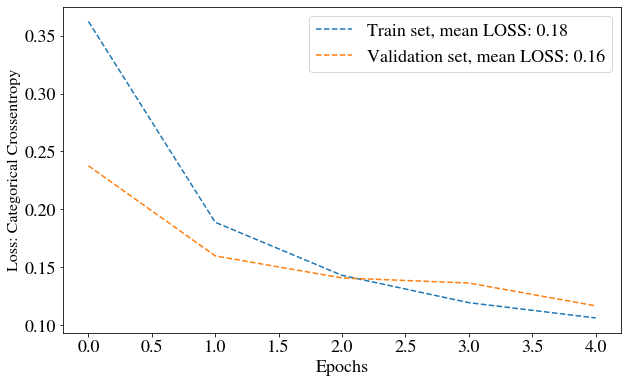

<Figure size 720x432 with 0 Axes>

In [44]:
plt.plot(train.history['loss'],'--',label=r'Train set, mean LOSS: %.2f'%np.mean(train.history['loss']))
plt.plot(train.history['val_loss'],'--',label=r'Validation set, mean LOSS: %.2f'%np.mean(train.history['val_loss']))

plt.xlabel(r'Epochs', fontsize=18)
plt.ylabel(r'Loss: Categorical Crossentropy', fontsize=16)
plt.legend(loc=0)
plt.show()

plt.savefig('dense-mnist_loss.pdf')

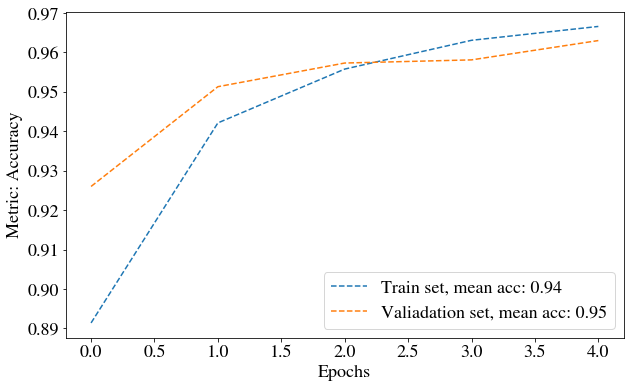

<Figure size 720x432 with 0 Axes>

In [43]:
plt.plot(train.history['accuracy'],'--',label=r'Train set, mean acc: %.2f'%np.mean(train.history['accuracy']))
plt.plot(train.history['val_accuracy'],'--',label=r'Valiadation set, mean acc: %.2f'%np.mean(train.history['val_accuracy']))

plt.xlabel(r'Epochs', fontsize=18)
plt.ylabel(r'Metric: Accuracy', fontsize=18)
plt.legend(loc=0)
plt.show()

plt.savefig('dense-mnist_acc.pdf')

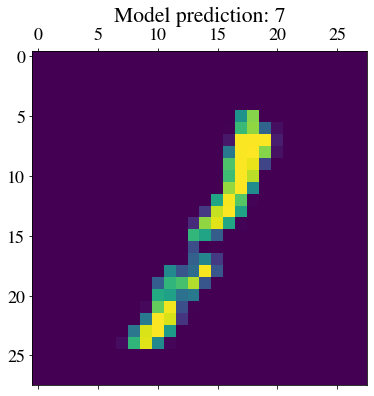

In [31]:
ransec = np.random.randint(0,10000)

p = np.argmax(predc[ransec])
plt.matshow(test_images[ransec].reshape(28,28))
plt.title('Model prediction: %i'%p)

plt.show()

In [25]:
# Breaking the model
# Breaks the model just simply chaging the softmax activation func.
# on the output layer by a linear func.

model_broken = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='linear'),
])

# Compile the model.
model_broken.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
train_broken = model_broken.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
  validation_data=(test_images,to_categorical(test_labels))
)

predc_broken = model_broken.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 9.8929 - accuracy: 0.1005 - val_loss: 9.7079 - val_accuracy: 0.0954
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 9.6994 - accuracy: 0.1004 - val_loss: 9.7079 - val_accuracy: 0.0954
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 9.7704 - accuracy: 0.0989 - val_loss: 9.7079 - val_accuracy: 0.0954
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 9.6863 - accuracy: 0.1007 - val_loss: 9.7079 - val_accuracy: 0.0954
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 9.8126 - accuracy: 0.0971 - val_loss: 9.7079 - val_accuracy: 0.0954


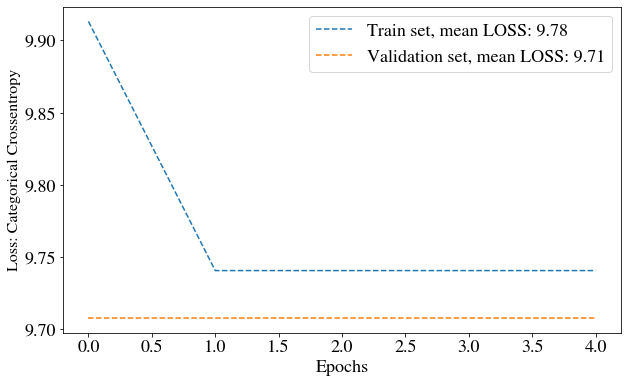

<Figure size 720x432 with 0 Axes>

In [42]:
plt.plot(train_broken.history['loss'],'--',label=r'Train set, mean LOSS: %.2f'%np.mean(train_broken.history['loss']))
plt.plot(train_broken.history['val_loss'],'--',label=r'Validation set, mean LOSS: %.2f'%np.mean(train_broken.history['val_loss']))

plt.xlabel(r'Epochs', fontsize=18)
plt.ylabel(r'Loss: Categorical Crossentropy', fontsize=16)
plt.legend(loc=0)
plt.show()

plt.savefig('dense-broken-mnist_loss.pdf')

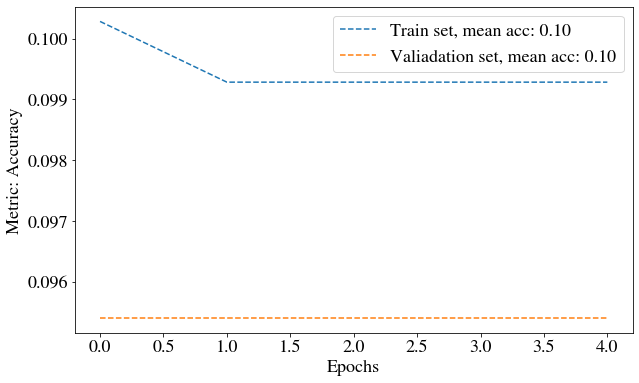

<Figure size 720x432 with 0 Axes>

In [41]:
plt.plot(train_broken.history['accuracy'],'--',label=r'Train set, mean acc: %.2f'%np.mean(train_broken.history['accuracy']))
plt.plot(train_broken.history['val_accuracy'],'--',label=r'Valiadation set, mean acc: %.2f'%np.mean(train_broken.history['val_accuracy']))

plt.xlabel(r'Epochs', fontsize=18)
plt.ylabel(r'Metric: Accuracy', fontsize=18)
plt.legend(loc=0)
plt.show()

plt.savefig('dense-broken-mnist_acc.pdf')

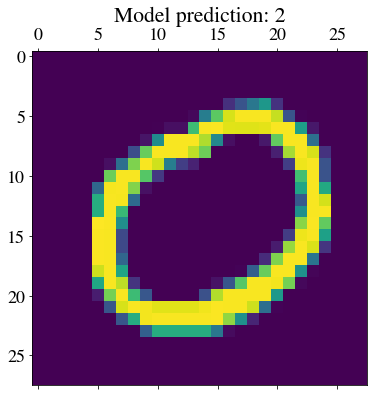

In [40]:
ransec = np.random.randint(0,10000)

p = np.argmax(predc_broken[ransec])
plt.matshow(test_images[ransec].reshape(28,28))
plt.title('Model prediction: %i'%p)

plt.show()